In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
#reading Dataset
leads_data = pd.read_csv("Leads.csv",  sep = ',',encoding = "ISO-8859-1")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
leads_data.shape

(9240, 37)

In [5]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads_data.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_data.isnull().sum()/leads_data.shape[0]),2).sort_values(ascending=False), columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
Tags,3353,36.29
What matters most to you in choosing a course,2709,29.32
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


In [6]:
# Checking if any column exists with only null values
leads_data.isnull().all(axis=0).any()

False

In [7]:
# Remove columns which has only one unique value
# Deleting the following columns as they have only one unique value, 
# It cannot be responsible in predicting a successful lead case.
leads_data= leads_data.loc[:,leads_data.nunique()!=1]
leads_data.shape

(9240, 32)

In [8]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
leads_data = leads_data.drop('Asymmetrique Activity Score', axis=1)
leads_data = leads_data.drop('Asymmetrique Profile Score', axis=1)
leads_data.shape

(9240, 30)

In [9]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
leads_data = leads_data.drop('Prospect ID', axis=1)
leads_data.shape

(9240, 29)

In [10]:
# Deleting the columns 'What matters most to you in choosing a course' as it mostly has unique values and some null values.
leads_data = leads_data.drop('What matters most to you in choosing a course', axis=1)
leads_data.shape

(9240, 28)

In [11]:
# Deleting the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
# that contribute to the 'Converted' percentage.
leads_data = leads_data.drop('How did you hear about X Education', axis=1)
leads_data.shape

(9240, 27)

In [12]:
total = pd.DataFrame(leads_data.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_data.isnull().sum()/leads_data.shape[0]),2).sort_values(ascending=False), columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
Specialization,1438,15.56
City,1420,15.37
Page Views Per Visit,137,1.48


In [13]:
#checking unique values in columns having NAN values greater than 30%
print("Lead Quality" ,leads_data['Lead Quality'].unique())
print("Tags" ,leads_data['Tags'].unique())
print("Assymetrique Activity Index" ,leads_data['Asymmetrique Activity Index'].unique())
print("Assymetrique Profile Index" ,leads_data['Asymmetrique Profile Index'].unique())

Lead Quality ['Low in Relevance' nan 'Might be' 'Not Sure' 'Worst' 'High in Relevance']
Tags ['Interested in other courses' 'Ringing'
 'Will revert after reading the email' nan 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']
Assymetrique Activity Index ['02.Medium' '01.High' '03.Low' nan]
Assymetrique Profile Index ['02.Medium' '01.High' '03.Low' nan]


In [14]:
#droping columns having NAN values greater than 30%
leads_data = leads_data.drop(columns=['Lead Quality', 'Tags','Asymmetrique Activity Index','Asymmetrique Profile Index'])

In [15]:
total = pd.DataFrame(leads_data.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_data.isnull().sum()/leads_data.shape[0]),2).sort_values(ascending=False), columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
Specialization,1438,15.56
City,1420,15.37
Page Views Per Visit,137,1.48
TotalVisits,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
Lead Origin,0,0.00


In [16]:
#Imputing with Median values because the continuous variables have outliers:
leads_data['TotalVisits'].replace(np.NaN, leads_data['TotalVisits'].median(), inplace =True)
leads_data['Page Views Per Visit'].replace(np.NaN, leads_data['Page Views Per Visit'].median(), inplace =True)

In [17]:
total = pd.DataFrame(leads_data.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_data.isnull().sum()/leads_data.shape[0]),2).sort_values(ascending=False), columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
Specialization,1438,15.56
City,1420,15.37
Last Activity,103,1.11
Lead Source,36,0.39
Page Views Per Visit,0,0.00
Lead Origin,0,0.00
Do Not Email,0,0.00


In [18]:
#Removing 'country' column as it is online course.
leads_data = leads_data.drop(columns = ['Country'])

In [19]:
total = pd.DataFrame(leads_data.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_data.isnull().sum()/leads_data.shape[0]),2).sort_values(ascending=False), columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Specialization,1438,15.56
City,1420,15.37
Last Activity,103,1.11
Lead Source,36,0.39
Page Views Per Visit,0,0.00
Lead Origin,0,0.00
Do Not Email,0,0.00
Do Not Call,0,0.00


In [20]:
leads_data['City'].isnull().sum()

1420

In [21]:
leads_data['City'].fillna("Unknown", inplace = True)
leads_data['City'].value_counts()

Mumbai                         3222
Select                         2249
Unknown                        1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
leads_data['City'].replace('Select', 'Unknown', inplace =True)
leads_data['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
leads_data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
leads_data['Specialization'].fillna("Unknown", inplace = True)
leads_data['Specialization'].value_counts()

Select                               1942
Unknown                              1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
leads_data['Last Activity'].fillna("Unknown", inplace = True)
leads_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [26]:
total = pd.DataFrame(leads_data.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_data.isnull().sum()/leads_data.shape[0]),2).sort_values(ascending=False), columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Lead Source,36,0.39
Last Notable Activity,0,0.00
Last Activity,0,0.00
Lead Origin,0,0.00
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,0,0.00


In [27]:
leads_data['Lead Source'].isnull().sum()

36

In [28]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
leads_data = leads_data[~pd.isnull(leads_data['Lead Source'])]
leads_data.shape

(9204, 22)

In [29]:
leads_data['Lead Profile'].isnull().sum()


2709

In [30]:
leads_data['Lead Profile'].fillna("Unknown", inplace = True)
leads_data['Lead Profile'].value_counts()

Select                         4115
Unknown                        2709
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [31]:
leads_data['Lead Profile'].replace('Select', 'Unknown', inplace =True)
leads_data['Lead Profile'].value_counts()

Unknown                        6824
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [32]:
leads_data['What is your current occupation'].isnull().sum()

2690

In [33]:
leads_data['What is your current occupation'].fillna("Unknown", inplace = True)
leads_data['What is your current occupation'].value_counts()

Unemployed              5567
Unknown                 2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
total = pd.DataFrame(leads_data.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_data.isnull().sum()/leads_data.shape[0]),2).sort_values(ascending=False), columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Last Notable Activity,0,0.0
A free copy of Mastering The Interview,0,0.0
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Do Not Call,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0


In [35]:
leads_data.shape

(9204, 22)

In [36]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
leads_data.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9204.0,617194.608648,23418.830233,579533.0,596484.5,615479.0,637409.25,650513.1,655405.85,659599.46,660737.0
Converted,9204.0,0.383746,0.486324,0.0,0.0,0.0,1.00,1.0,1.00,1.00,1.0
TotalVisits,9204.0,3.449587,4.824662,0.0,1.0,3.0,5.00,7.0,10.00,17.00,251.0
Total Time Spent on Website,9204.0,489.005541,547.980340,0.0,14.0,250.0,938.00,1380.0,1562.00,1839.97,2272.0
Page Views Per Visit,9204.0,2.364923,2.145999,0.0,1.0,2.0,3.00,5.0,6.00,9.00,55.0


In [37]:
numvar = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numvar)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


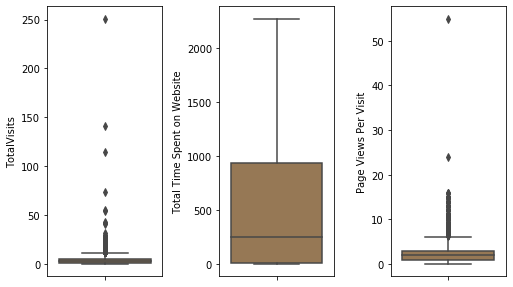

In [38]:
numvar = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=leads_data)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numvar)

In [39]:
##Removing outlier values based on the Interquartile distance for some of the continuous variable
Q1 = leads_data['TotalVisits'].quantile(0.25)
Q3 = leads_data['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads_data=leads_data.loc[(leads_data['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_data['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads_data['Page Views Per Visit'].quantile(0.25)
Q3 = leads_data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads_data=leads_data.loc[(leads_data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_data['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads_data.shape

(8575, 22)

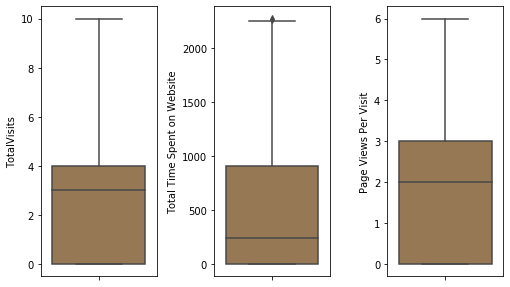

In [40]:
boxplot(numvar)

In [41]:
# List of variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,Unknown,Unknown,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,Unknown,Unknown,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,Potential Lead,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,Unknown,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,Unknown,Mumbai,0,Modified


In [42]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Source','Lead Origin','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)
leads_data.shape

(8575, 60)

In [43]:
# Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' which represents null/select values.

# Creating dummy variables for the variable 'Lead Profile'
ml = pd.get_dummies(leads_data['Lead Profile'], prefix='Lead Profile')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Profile_Unknown'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(leads_data['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(leads_data['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'City'
ml = pd.get_dummies(leads_data['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads_data['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Last Activity_Unknown'], 1)
#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ml1], axis=1)
#--------------------------------------------------------------------------------------
leads_data.shape

(8575, 113)

In [44]:
leads_data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       ...
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object', length=113)

In [45]:
leads_data = leads_data.drop(['Lead Profile','Lead Origin','What is your current occupation','Specialization', 'City','Last Activity','Lead Source','Last Notable Activity'], 1)
leads_data.shape

(8575, 105)

In [46]:
##Test-Train Split
# Putting feature variable to X
X = leads_data.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
8529,0,0,0.969969,-0.864724,1.785283,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7331,0,0,0.102087,-0.215257,0.562949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7688,0,0,0.102087,1.523992,0.562949,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,0,0,0.536028,-0.686762,1.174116,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4908,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6002.000000,6002.0,6.002000e+03,6.002000e+03,6.002000e+03,6002.000000,6002.0,6002.0,6002.000000,6002.000000,...,6002.000000,6002.000000,6002.000000,6002.000000,6002.0,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,0.076308,0.0,6.130088e-17,1.427826e-16,1.538996e-17,0.001000,0.0,0.0,0.000167,0.000333,...,0.014162,0.002499,0.111629,0.063146,0.0,0.298567,0.010163,0.007331,0.000333,0.000167
std,0.265512,0.0,1.000083e+00,1.000083e+00,1.000083e+00,0.031604,0.0,0.0,0.012908,0.018253,...,0.118168,0.049933,0.314936,0.243245,0.0,0.457668,0.100308,0.085313,0.018253,0.012908
min,0.000000,0.0,-1.199737e+00,-8.720622e-01,-1.270553e+00,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,-7.657957e-01,-8.683929e-01,-6.593854e-01,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,1.020868e-01,-4.381673e-01,-4.821826e-02,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,5.360281e-01,7.846274e-01,5.629489e-01,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,3.139676e+00,3.296264e+00,2.396450e+00,1.000000,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
### Checking the Lead Conversion Rate
converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
converted

38.04081632653061

In [52]:
#### We have almost 38% lead conversion rate
import statsmodels.api as sm

In [53]:
# Logistic regression model
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5908
Model Family:                Binomial   Df Model:                           93
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Apr 2020   Deviance:                          nan
Time:                        15:00:34   Pearson chi2:                 5.74e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -2.324e+15   1.07e+08  -2.17e+07      0.000   -2.32e+15   -2.32e+15
Do Not Email                                         -7.892e+14   4.63e+06  -1.71e+08      0.000   -7.89e+14   -7.89e+14
Do Not Call                                           -113.6858   2.81e-06  -4.05e+07      0.000    -113.686    -113.686
TotalVisits                                           2.711e+13    1.5e+06    1.8e+07      0.000    2.71e+13    2.71e+13
Total Time Spent on Website                           2.554e+13   1.02e+06    2.5e+07      0.000    2.55e+13    2.55e+13
Page Views Per Visit                                  3.124e+13   1.63e+06   1.92e+07      0.000    3.12e+13    3.12e+13
Search                                                 1.05e+15   2.89e+07   3.63e+07      0.000    1.05e+15    1.05e+15
Newspaper Article                                      -85.1445   9.16e-07  -9.29e+07      0.000     -85.145     -85.145
X Education Forums                                      12.1547   1.24e-06   9.78e+06      0.000      12.155      12.155
Newspaper                                             -8.65e+15   6.75e+07  -1.28e+08      0.000   -8.65e+15   -8.65e+15
Digital Advertisement                                -1.267e+15   4.78e+07  -2.65e+07      0.000   -1.27e+15   -1.27e+15
Through Recommendations                              -1.592e+15   4.98e+07  -3.19e+07      0.000   -1.59e+15   -1.59e+15
A free copy of Mastering The Interview                5.732e+12   2.91e+06   1.97e+06      0.000    5.73e+12    5.73e+12
Lead Source_Direct Traffic                            2.072e+15   7.81e+07   2.65e+07      0.000    2.07e+15    2.07e+15
Lead Source_Facebook                                  4.586e+14   3.94e+07   1.17e+07      0.000    4.59e+14    4.59e+14
Lead Source_Google                                    2.181e+15    7.8e+07    2.8e+07      0.000    2.18e+15    2.18e+15
Lead Source_Live Chat                                 1.157e+15   6.15e+07   1.88e+07      0.000    1.16e+15    1.16e+15
Lead Source_NC_EDM                                    4.126e+15   1.03e+08   4.01e+07      0.000    4.13e+15    4.13e+15
Lead Source_Olark Chat                                2.194e+15   7.79e+07   2.82e+07      0.000    2.19e+15    2.19e+15
Lead Source_Organic Search                            2.187e+15   7.81e+07    2.8e+07      0.000    2.19e+15    2.19e+15
Lead Source_Pay per Click Ads                        -2.869e+15   1.03e+08  -2.79e+07      0.000   -2.87e+15   -2.87e+15
Lead Source_Press_Release                               16.7608   5.67e-07   2.95e+07      0.000      16.761      16.761
Lead Source_Reference                                -1.46

In [54]:
###Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [55]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [56]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False])

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 83),
 ('TotalVisits', False, 63),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 62),
 ('Search', False, 20),
 ('Newspaper Article', False, 77),
 ('X Education Forums', False, 78),
 ('Newspaper', False, 7),
 ('Digital Advertisement', False, 76),
 ('Through Recommendations', False, 23),
 ('A free copy of Mastering The Interview', False, 67),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 60),
 ('Lead Source_Press_Release', False, 80),
 ('Lead Source_Reference', False, 72),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Social Media', False, 71),
 ('Lead Source_WeLearn', False, 82),
 ('Lead Source_Welingak Website', True, 1),
 ('Lea

In [58]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Approached upfront',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Received',
       'Last Notable Acti

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logreg2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5981
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2297.3
Date:                Mon, 20 Apr 2020   Deviance:                       4594.7
Time:                        15:00:38   Pearson chi2:                 6.29e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0544      0.075     -0.729      0.466      -0.201       0.092
Do Not Email                                            -1.7159      0.185     -9.270      0.000      -2.079      -1.353
Total Time Spent on Website                              1.0146      0.042     23.975      0.000       0.932       1.097
Lead Source_Olark Chat                                   1.3264      0.110     12.059      0.000       1.111       1.542
Lead Source_Welingak Website                             3.0497      0.754      4.042      0.000       1.571       4.528
Lead Origin_Lead Add Form                                3.0081      0.208     14.483      0.000       2.601       3.415
Last Notable Activity_Email Link Clicked                -1.9258      0.282     -6.841      0.000      -2.478      -1.374
Last Notable Activity_Email Opened                      -1.5567      0.095    -16.391      0.000      -1.743      -1.371
Last Notable Activity_Modified                          -2.0201      0.103    -19.623      0.000      -2.222      -1.818
Last Notable Activity_Olark Chat Conversation           -1.8826      0.419     -4.495      0.000      -2.703      -1.062
Last Notable Activity_Page Visited on Website           -1.7660      0.240     -7.360      0.000      -2.236      -1.296
Lead Profile_Dual Specialization Student                23.6022   2.32e+04      0.001      0.999   -4.55e+04    4.56e+04
Lead Profile_Lateral Student                             2.9918      1.098      2.725      0.006       0.840       5.144
Lead Profile_Potential Lead                              1.8633      0.105     17.775      0.000       1.658       2.069
Lead Profile_Student of SomeSchool                      -2.0913      0.436     -4.800      0.000      -2.945      -1.237
What is your current occupation_Housewife               23.2503   2.42e+04      0.001      0.999   -4.74e+04    4.75e+04
What is your current occupation_Student                  0.8791      0.267      3.295      0.001       0.356       1.402
What is your current occupation_Working Professional     2.2479      0.194     11.603      0.000       1.868       2.628
Last Activity_Approached upfront                        23.8446   2.47e+04      0.001      0.999   -4.83e+04    4.84e+04
Last Activity_Had a Phone Conversation                  -1.6853      0.817     -2.062      0.039      -3.287      -0.084
Last Activity_Olark Chat Conversation                   -1.3465      0.212     -6.359      0.000      -1.762      -0.931
========================================================================================================================
"""

In [61]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.282573
7331    0.138300
7688    0.816341
92      0.090475
4908    0.048364
451     0.130295
4945    0.131565
2844    0.987742
4355    0.236946
7251    0.009787
dtype: float64

In [62]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2825728 , 0.13829959, 0.81634146, 0.09047452, 0.04836446,
       0.13029469, 0.13156548, 0.9877422 , 0.23694607, 0.00978666])

In [63]:
##Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.282573,8529
1,0,0.138300,7331
2,1,0.816341,7688
3,0,0.090475,92
4,0,0.048364,4908


In [64]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.282573,8529,0
1,0,0.138300,7331,0
2,1,0.816341,7688,1
3,0,0.090475,92,0
4,0,0.048364,4908,0


In [65]:
from sklearn import metrics

In [66]:
# Matrix 
conm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(conm)

[[3361  375]
 [ 617 1649]]


In [67]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8347217594135288


In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Activity_Olark Chat Conversation,1.95
2,Lead Source_Olark Chat,1.72
4,Lead Origin_Lead Add Form,1.63
7,Last Notable Activity_Modified,1.57
12,Lead Profile_Potential Lead,1.43
3,Lead Source_Welingak Website,1.32
8,Last Notable Activity_Olark Chat Conversation,1.30
1,Total Time Spent on Website,1.24
16,What is your current occupation_Working Profes...,1.23
13,Lead Profile_Student of SomeSchool,1.17


In [70]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Approached upfront',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logre = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logre.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5982
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2301.5
Date:                Mon, 20 Apr 2020   Deviance:                       4603.0
Time:                        15:00:39   Pearson chi2:                 6.31e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0544      0.075     -0.729      0.466      -0.201       0.092
Do Not Email                                            -1.7193      0.185     -9.284      0.000      -2.082      -1.356
Total Time Spent on Website                              1.0154      0.042     24.012      0.000       0.933       1.098
Lead Source_Olark Chat                                   1.3237      0.110     12.043      0.000       1.108       1.539
Lead Source_Welingak Website                             3.0124      0.754      3.994      0.000       1.534       4.491
Lead Origin_Lead Add Form                                3.0427      0.207     14.674      0.000       2.636       3.449
Last Notable Activity_Email Link Clicked                -1.8930      0.278     -6.819      0.000      -2.437      -1.349
Last Notable Activity_Email Opened                      -1.5537      0.095    -16.366      0.000      -1.740      -1.368
Last Notable Activity_Modified                          -2.0139      0.103    -19.581      0.000      -2.216      -1.812
Last Notable Activity_Olark Chat Conversation           -1.8770      0.419     -4.482      0.000      -2.698      -1.056
Last Notable Activity_Page Visited on Website           -1.7660      0.240     -7.358      0.000      -2.236      -1.296
Lead Profile_Dual Specialization Student                23.6003   2.32e+04      0.001      0.999   -4.55e+04    4.56e+04
Lead Profile_Lateral Student                             2.9784      1.098      2.712      0.007       0.826       5.130
Lead Profile_Potential Lead                              1.8641      0.105     17.801      0.000       1.659       2.069
Lead Profile_Student of SomeSchool                      -2.0942      0.436     -4.804      0.000      -2.949      -1.240
What is your current occupation_Student                  0.8743      0.267      3.276      0.001       0.351       1.397
What is your current occupation_Working Professional     2.2428      0.194     11.574      0.000       1.863       2.623
Last Activity_Approached upfront                        23.8369   2.46e+04      0.001      0.999   -4.82e+04    4.83e+04
Last Activity_Had a Phone Conversation                  -1.6988      0.819     -2.075      0.038      -3.303      -0.094
Last Activity_Olark Chat Conversation                   -1.3503      0.212     -6.379      0.000      -1.765      -0.935
========================================================================================================================
"""

In [72]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.282431
7331    0.138637
7688    0.816549
92      0.090673
4908    0.048320
451     0.130608
4945    0.131883
2844    0.987704
4355    0.236876
7251    0.009815
dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28243136, 0.13863663, 0.8165487 , 0.09067341, 0.04832034,
       0.13060846, 0.13188294, 0.98770432, 0.23687602, 0.00981501])

In [74]:
#Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.282431,8529
1,0,0.138637,7331
2,1,0.816549,7688
3,0,0.090673,92
4,0,0.048320,4908


In [75]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.282431,8529,0
1,0,0.138637,7331,0
2,1,0.816549,7688,1
3,0,0.090673,92,0
4,0,0.048320,4908,0


In [76]:
conm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(conm)

[[3358  378]
 [ 616 1650]]


In [77]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8343885371542819


In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Activity_Olark Chat Conversation,1.95
2,Lead Source_Olark Chat,1.72
4,Lead Origin_Lead Add Form,1.62
7,Last Notable Activity_Modified,1.57
12,Lead Profile_Potential Lead,1.43
3,Lead Source_Welingak Website,1.32
8,Last Notable Activity_Olark Chat Conversation,1.30
1,Total Time Spent on Website,1.24
15,What is your current occupation_Working Profes...,1.23
13,Lead Profile_Student of SomeSchool,1.17


In [80]:
col = col.drop('Lead Profile_Dual Specialization Student', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Approached upfront',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logreg3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5983
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2308.5
Date:                Mon, 20 Apr 2020   Deviance:                       4617.0
Time:                        15:00:40   Pearson chi2:                 6.33e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0505      0.075     -0.677      0.498      -0.197       0.096
Do Not Email                                            -1.7222      0.185     -9.298      0.000      -2.085      -1.359
Total Time Spent on Website                              1.0182      0.042     24.079      0.000       0.935       1.101
Lead Source_Olark Chat                                   1.3224      0.110     12.051      0.000       1.107       1.537
Lead Source_Welingak Website                             3.0121      0.754      3.993      0.000       1.533       4.491
Lead Origin_Lead Add Form                                3.0398      0.207     14.661      0.000       2.633       3.446
Last Notable Activity_Email Link Clicked                -1.8958      0.278     -6.829      0.000      -2.440      -1.352
Last Notable Activity_Email Opened                      -1.5426      0.095    -16.291      0.000      -1.728      -1.357
Last Notable Activity_Modified                          -2.0157      0.103    -19.607      0.000      -2.217      -1.814
Last Notable Activity_Olark Chat Conversation           -1.8807      0.419     -4.489      0.000      -2.702      -1.060
Last Notable Activity_Page Visited on Website           -1.7698      0.240     -7.370      0.000      -2.240      -1.299
Lead Profile_Lateral Student                             2.9721      1.098      2.706      0.007       0.819       5.125
Lead Profile_Potential Lead                              1.8560      0.105     17.722      0.000       1.651       2.061
Lead Profile_Student of SomeSchool                      -2.1045      0.436     -4.823      0.000      -2.960      -1.249
What is your current occupation_Student                  0.8694      0.267      3.257      0.001       0.346       1.393
What is your current occupation_Working Professional     2.2629      0.193     11.705      0.000       1.884       2.642
Last Activity_Approached upfront                        22.8370   1.49e+04      0.002      0.999   -2.92e+04    2.93e+04
Last Activity_Had a Phone Conversation                  -1.7026      0.819     -2.078      0.038      -3.308      -0.097
Last Activity_Olark Chat Conversation                   -1.3489      0.212     -6.374      0.000      -1.764      -0.934
========================================================================================================================
"""

In [82]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.282717
7331    0.140354
7688    0.817764
92      0.091750
4908    0.048303
451     0.132220
4945    0.133512
2844    0.988063
4355    0.238890
7251    0.009724
dtype: float64

In [83]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28271693, 0.14035442, 0.81776389, 0.09174962, 0.04830253,
       0.13222013, 0.13351151, 0.9880633 , 0.23888969, 0.00972394])

In [84]:
#Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.282717,8529
1,0,0.140354,7331
2,1,0.817764,7688
3,0,0.091750,92
4,0,0.048303,4908


In [85]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.282717,8529,0
1,0,0.140354,7331,0
2,1,0.817764,7688,1
3,0,0.091750,92,0
4,0,0.048303,4908,0


In [86]:
conm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(conm)

[[3354  382]
 [ 617 1649]]


In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8335554815061647


In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Activity_Olark Chat Conversation,1.95
2,Lead Source_Olark Chat,1.71
4,Lead Origin_Lead Add Form,1.62
7,Last Notable Activity_Modified,1.57
11,Lead Profile_Potential Lead,1.42
3,Lead Source_Welingak Website,1.32
8,Last Notable Activity_Olark Chat Conversation,1.30
1,Total Time Spent on Website,1.24
14,What is your current occupation_Working Profes...,1.23
12,Lead Profile_Student of SomeSchool,1.17


In [90]:
col = col.drop('Last Activity_Approached upfront', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logreg4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5984
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2314.3
Date:                Mon, 20 Apr 2020   Deviance:                       4628.5
Time:                        15:00:42   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0516      0.075     -0.692      0.489      -0.198       0.095
Do Not Email                                            -1.7272      0.185     -9.332      0.000      -2.090      -1.364
Total Time Spent on Website                              1.0203      0.042     24.150      0.000       0.937       1.103
Lead Source_Olark Chat                                   1.3359      0.110     12.192      0.000       1.121       1.551
Lead Source_Welingak Website                             3.0060      0.754      3.985      0.000       1.528       4.484
Lead Origin_Lead Add Form                                3.0443      0.207     14.706      0.000       2.639       3.450
Last Notable Activity_Email Link Clicked                -1.8991      0.278     -6.842      0.000      -2.443      -1.355
Last Notable Activity_Email Opened                      -1.5439      0.095    -16.305      0.000      -1.729      -1.358
Last Notable Activity_Modified                          -1.9993      0.102    -19.512      0.000      -2.200      -1.798
Last Notable Activity_Olark Chat Conversation           -1.8654      0.419     -4.453      0.000      -2.686      -1.044
Last Notable Activity_Page Visited on Website           -1.7701      0.240     -7.371      0.000      -2.241      -1.299
Lead Profile_Lateral Student                             2.9645      1.099      2.699      0.007       0.811       5.118
Lead Profile_Potential Lead                              1.8513      0.105     17.687      0.000       1.646       2.056
Lead Profile_Student of SomeSchool                      -2.1093      0.436     -4.834      0.000      -2.964      -1.254
What is your current occupation_Student                  0.8672      0.267      3.249      0.001       0.344       1.390
What is your current occupation_Working Professional     2.2604      0.193     11.692      0.000       1.881       2.639
Last Activity_Had a Phone Conversation                  -1.7085      0.819     -2.085      0.037      -3.314      -0.103
Last Activity_Olark Chat Conversation                   -1.3723      0.211     -6.491      0.000      -1.787      -0.958
========================================================================================================================
"""

In [92]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.282140
7331    0.140020
7688    0.818072
92      0.091438
4908    0.048479
451     0.131886
4945    0.133177
2844    0.988074
4355    0.240612
7251    0.009817
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28214028, 0.14002013, 0.81807173, 0.09143818, 0.0484785 ,
       0.13188626, 0.13317749, 0.98807383, 0.24061192, 0.00981696])

In [94]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.282140,8529
1,0,0.140020,7331
2,1,0.818072,7688
3,0,0.091438,92
4,0,0.048479,4908


In [95]:
#Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.282140,8529,0
1,0,0.140020,7331,0
2,1,0.818072,7688,1
3,0,0.091438,92,0
4,0,0.048479,4908,0


In [96]:
from sklearn import metrics

In [97]:
# Confusion matrix 
conm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(conm)

[[3353  383]
 [ 619 1647]]


In [98]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8330556481172943


In [99]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Activity_Olark Chat Conversation,1.95
2,Lead Source_Olark Chat,1.71
4,Lead Origin_Lead Add Form,1.62
7,Last Notable Activity_Modified,1.57
11,Lead Profile_Potential Lead,1.42
3,Lead Source_Welingak Website,1.32
8,Last Notable Activity_Olark Chat Conversation,1.30
1,Total Time Spent on Website,1.24
14,What is your current occupation_Working Profes...,1.23
12,Lead Profile_Student of SomeSchool,1.17


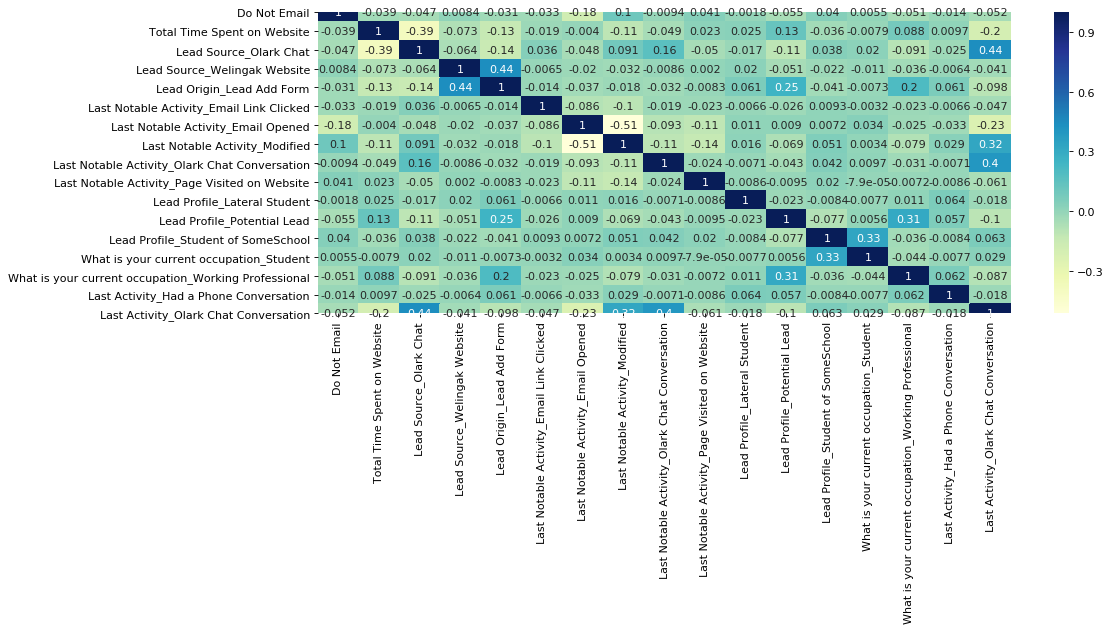

In [101]:
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [102]:
###Calculating Metrics beyond Accuracy

TP = conm[1,1] # true positive 
TN = conm[0,0] # true negatives
FP = conm[0,1] # false positives
FN = conm[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7268314210061783

In [104]:
# Let us calculate specificity
TN / float(TN+FP)

0.8974839400428265

In [105]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10251605995717344


In [106]:
# positive predictive value 
print (TP / float(TP+FP))

0.8113300492610838


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.844159113796576


In [108]:
####the ROC Curve:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

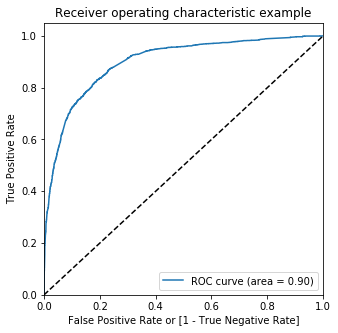

(array([0.        , 0.        , 0.        , ..., 0.99946467, 0.99973233,
        1.        ]),
 array([0.00000000e+00, 4.41306267e-04, 8.82612533e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99941124e+00, 9.99411241e-01, 9.99372576e-01, ...,
        1.19941076e-03, 6.51804074e-04, 3.39259519e-04]))

In [110]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [111]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [112]:
area = auc_val(fpr,tpr)
area

0.899340710172351

In [113]:
###Optimal Cutoff Point:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.282140,8529,0,1,1,1,0,0,0,0,0,0,0
1,0,0.140020,7331,0,1,1,0,0,0,0,0,0,0,0
2,1,0.818072,7688,1,1,1,1,1,1,1,1,1,1,0
3,0,0.091438,92,0,1,0,0,0,0,0,0,0,0,0
4,0,0.048479,4908,0,1,0,0,0,0,0,0,0,0,0


In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377541  1.000000  0.000000
0.1   0.1  0.667278  0.960724  0.489293
0.2   0.2  0.775408  0.922771  0.686028
0.3   0.3  0.808397  0.849073  0.783726
0.4   0.4  0.824892  0.781112  0.851445
0.5   0.5  0.833056  0.726831  0.897484
0.6   0.6  0.818727  0.629744  0.933351
0.7   0.7  0.802399  0.557811  0.950749
0.8   0.8  0.777574  0.459400  0.970557
0.9   0.9  0.732922  0.308473  0.990364


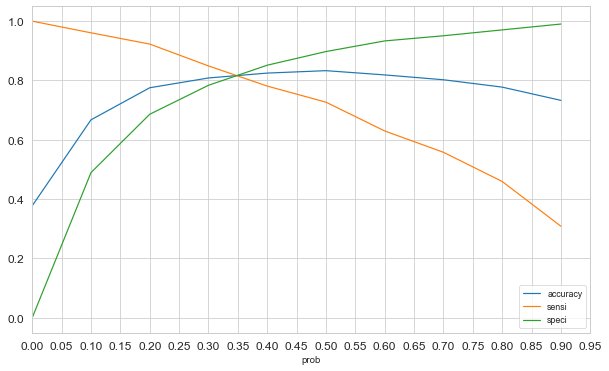

In [115]:
# Slightly alter the figure size to make it more horizontal.

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()


In [116]:
#From the curve above, 0.35 is the optimum point to take it as a cutoff probability:


In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.282140,8529,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.140020,7331,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.818072,7688,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.091438,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.048479,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8248917027657447

In [119]:
conm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
conm1

array([[3181,  555],
       [ 496, 1770]], dtype=int64)

In [120]:
TP = conm1[1,1] # true positive 
TN = conm1[0,0] # true negatives
FP = conm1[0,1] # false positives
FN = conm1[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7811120917917035

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.8514453961456103

In [123]:

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14855460385438973


In [124]:
# Positive predictive value 
print (TP / float(TP+FP))


0.7612903225806451


In [125]:
###Precision and Recall:
precision = conm1[1,1]/(conm1[0,1]+conm1[1,1])
precision

0.7612903225806451

In [126]:
recall = conm1[1,1]/(conm1[1,0]+conm1[1,1])
recall

0.7811120917917035

In [127]:
#Using sklearn utilities for the same

from sklearn.metrics import precision_score, recall_score

In [128]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7612903225806451

In [129]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7811120917917035

In [130]:
from sklearn.metrics import precision_recall_curve

In [131]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5997    0
 5998    0
 5999    0
 6000    1
 6001    0
 Name: Converted, Length: 6002, dtype: int64, 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5997    0
 5998    0
 5999    0
 6000    1
 6001    0
 Name: final_predicted, Length: 6002, dtype: int64)

In [132]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

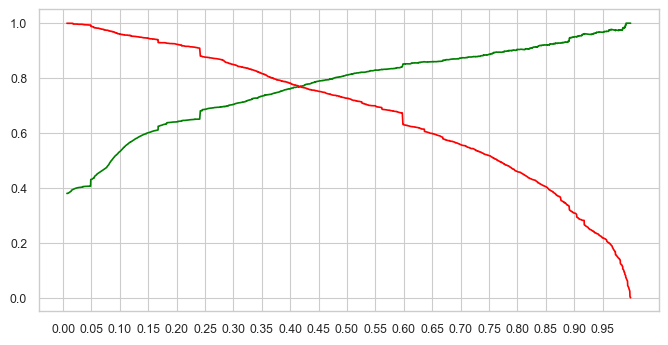

In [133]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

In [134]:
#From the precision-recall graph above, we get the optical threshold value as close to .42. However our business requirement here is to have Lead Conversion Rate around 80%.
#This is already achieved with our earlier threshold value of 0.36. So we will stick to this value.

In [135]:
#F1 score:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.7710738401219779

In [136]:
#Making predictions on the test set
#Using the scaler function from the train dataset to transfor the test dataset

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
6190,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7073,0,0,0.969969,-0.615211,1.785283,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,1,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
440,0,0,1.403911,-0.094170,0.562949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Welingak Website,Lead Origin_Lead Add Form,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,What is your current occupation_Student,What is your current occupation_Working Professional,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation
6190,0,-0.872062,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
7073,0,-0.615211,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4519,1,-0.872062,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
607,0,-0.872062,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
440,0,-0.094170,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [138]:
X_test_sm = sm.add_constant(X_test)

In [139]:
#Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

6190    0.007017
7073    0.097687
4519    0.208724
607     0.993043
440     0.104617
4247    0.113576
7431    0.134044
726     0.463614
7300    0.095993
4046    0.181749
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [142]:
# Let's see the head
y_pred_1.head()

,0
6190,0.007017
7073,0.097687
4519,0.208724
607,0.993043
440,0.104617


In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [144]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [145]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [147]:
y_pred_final.head()

,Converted,LeadID,0
0,0,6190,0.007017
1,0,7073,0.097687
2,0,4519,0.208724
3,1,607,0.993043
4,0,440,0.104617


In [148]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [149]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,6190,0.007017
1,0,7073,0.097687
2,0,4519,0.208724
3,1,607,0.993043
4,0,440,0.104617


In [150]:
y_pred_final.shape

(2573, 3)

In [151]:
#Using the probability threshold value 0f 0.33 on the test dataset to predict if a lead will convert

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [152]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,6190,0.007017,0
1,0,7073,0.097687,0
2,0,4519,0.208724,0
3,1,607,0.993043,1
4,0,440,0.104617,0


In [153]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.8266614846482705

In [154]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1349  228]
 [ 218  778]]


In [155]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7811244979919679

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.8554216867469879

In [158]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14457831325301204


In [159]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7733598409542743


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8608806636885769


In [161]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.7733598409542743

In [162]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.7811244979919679

In [163]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.7772227772227773

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1577
           1       0.77      0.78      0.78       996

    accuracy                           0.83      2573
   macro avg       0.82      0.82      0.82      2573
weighted avg       0.83      0.83      0.83      2573



In [165]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.66744457 0.8032596  0.81796966 0.82263711 0.82263711 0.84400466
 0.84480747 0.84597433 0.84830805 0.86713287]
0.8184175424283933


In [166]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [167]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

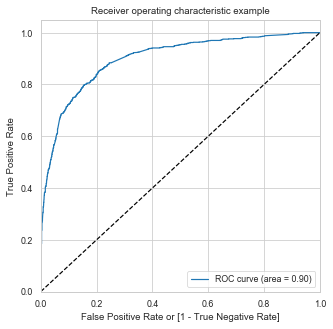

(array([0.        , 0.        , 0.        , ..., 0.99873177, 0.99936588,
        1.        ]),
 array([0.        , 0.00100402, 0.00200803, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99931409e+00, 9.99314088e-01, 9.99017087e-01, ...,
        1.52364926e-03, 1.27335736e-03, 1.20841426e-03]))

In [168]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [169]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [170]:
area = auc_val(fpr,tpr)
area

0.8988897887045987

In [171]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,6190,0.007017,0
1,0,7073,0.097687,0
2,0,4519,0.208724,0
3,1,607,0.993043,1
4,0,440,0.104617,0


In [172]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.282140,8529,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.140020,7331,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.818072,7688,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.091438,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.048479,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [173]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,8529,0,0.282140,0
1,7331,0,0.140020,0
2,7688,1,0.818072,1
3,92,0,0.091438,0
4,4908,0,0.048479,0


In [174]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Conversion_Prob,Converted,LeadID,final_predicted
0,0.282140,0,8529,0
1,0.140020,0,7331,0
2,0.818072,1,7688,1
3,0.091438,0,92,0
4,0.048479,0,4908,0


In [175]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6002, 4)
(2573, 4)
(8575, 4)


In [176]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

8575

In [177]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Conversion_Prob,Converted,LeadID,final_predicted,Lead_Score
0,0.282140,0,8529,0,28
1,0.140020,0,7331,0,14
2,0.818072,1,7688,1,82
3,0.091438,0,92,0,9
4,0.048479,0,4908,0,5


In [178]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [179]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Conversion_Prob,Converted,final_predicted,Lead_Score
LeadID,,,,
0,0.167327,0,0,17
1,0.227303,0,0,23
2,0.956935,1,1,96
3,0.085513,0,0,9
4,0.433507,1,1,43


In [180]:
# Slicing the Lead Number column from original_leads dataframe
leads_data = leads_data[['Lead Number']]
leads_data.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [181]:
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([leads_data, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Conversion_Prob,Converted,final_predicted,Lead_Score
0,660737,0.167327,0,0,17
1,660728,0.227303,0,0,23
2,660727,0.956935,1,1,96
3,660719,0.085513,0,0,9
4,660681,0.433507,1,1,43
5,660680,0.048479,0,0,5
6,660673,0.878744,1,1,88
7,660664,0.048479,0,0,5
8,660624,0.086879,0,0,9
9,660616,0.084967,0,0,8


In [182]:
# Inspecting the dataframe shape
leads_with_score.shape

(8575, 5)

In [183]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.0
final_predicted,0,0.0
Converted,0,0.0
Conversion_Prob,0,0.0
Lead Number,0,0.0


In [184]:
##Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.73
Total Time Spent on Website                             1.02
Lead Source_Olark Chat                                  1.34
Lead Source_Welingak Website                            3.01
Lead Origin_Lead Add Form                               3.04
Last Notable Activity_Email Link Clicked               -1.90
Last Notable Activity_Email Opened                     -1.54
Last Notable Activity_Modified                         -2.00
Last Notable Activity_Olark Chat Conversation          -1.87
Last Notable Activity_Page Visited on Website          -1.77
Lead Profile_Lateral Student                            2.96
Lead Profile_Potential Lead                             1.85
Lead Profile_Student of SomeSchool                     -2.11
What is your current occupation_Student                 0.87
What is your current occupation_Working Professional    2.26
Last Activity_Had a Phone Conversation                 -1.71
Last Activity_Olark Chat

In [185]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient


feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -56.74
Total Time Spent on Website                             33.52
Lead Source_Olark Chat                                  43.88
Lead Source_Welingak Website                            98.74
Lead Origin_Lead Add Form                              100.00
Last Notable Activity_Email Link Clicked               -62.38
Last Notable Activity_Email Opened                     -50.71
Last Notable Activity_Modified                         -65.67
Last Notable Activity_Olark Chat Conversation          -61.28
Last Notable Activity_Page Visited on Website          -58.15
Lead Profile_Lateral Student                            97.38
Lead Profile_Potential Lead                             60.81
Lead Profile_Student of SomeSchool                     -69.29
What is your current occupation_Student                 28.49
What is your current occupation_Working Professional    74.25
Last Activity_Had a Phone Conversation                 -56.12
Last Act

In [186]:
##Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            12
Total Time Spent on Website                              7
Lead Source_Olark Chat                                   5
Lead Source_Welingak Website                             8
Lead Origin_Lead Add Form                                9
Last Notable Activity_Email Link Clicked                 0
Last Notable Activity_Email Opened                      15
Last Notable Activity_Modified                           6
Last Notable Activity_Olark Chat Conversation           16
Last Notable Activity_Page Visited on Website           13
Lead Profile_Lateral Student                             1
Lead Profile_Potential Lead                              2
Lead Profile_Student of SomeSchool                      11
What is your current occupation_Student                 14
What is your current occupation_Working Professional    10
Last Activity_Had a Phone Conversation                   3
Last Activity_Olark Chat Conversation                   

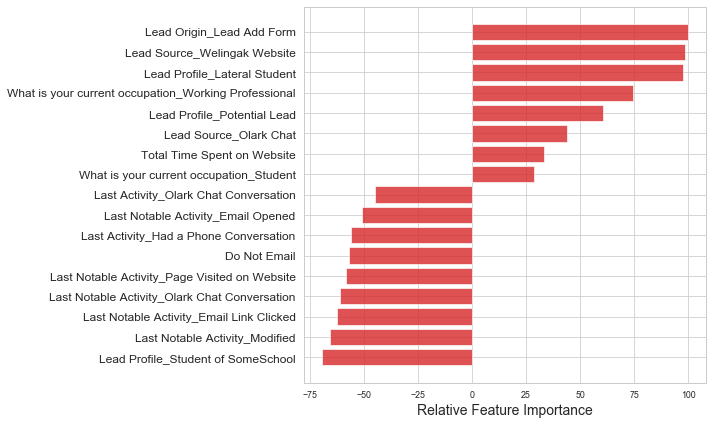

In [187]:
##Plot showing the feature variables based on their relative coefficient values

pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()